In [1]:
import hotspot
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr
import anndata as ad
import sys
import bbknn
from statsmodels import robust
import matplotlib.pyplot as plt
import os.path
import harmonypy as hm

In [2]:
### object from hotspot expression program analysis
input_file = '/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_CLCT_pcALCL_panfetal_PIP_scVI_hotspot_neib30_layer1_latent10_fdr0.01_top1000_rmTCRgene.h5ad'
adata = sc.read_h5ad(input_file)

In [3]:
meta = pd.read_csv('/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_CLCT_pcALCL_panfetal_PIP_scVI_hotspot_neib30_layer1_latent10_fdr0.01_top1000_rmTCRgene_meta.csv')

/home/jovyan/my-conda-envs/myenv_old/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (1,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
meta['donor_id'] = adata.obs['donor_id'].copy()

In [5]:
meta['tumour_type'] = adata.obs['tumour_type']

In [6]:
adata.obs = meta
adata.obs

ID  \
AAACCTGAGCCGTCGT-1-TL10712_CD3pos_GEX_CITE-0  TL10712_CD3pos_GEX_CITE   
AAACCTGAGGATATAC-1-TL10712_CD3pos_GEX_CITE-0  TL10712_CD3pos_GEX_CITE   
AAACCTGCAAGAAAGG-1-TL10712_CD3pos_GEX_CITE-0  TL10712_CD3pos_GEX_CITE   
AAACCTGCAGCATGAG-1-TL10712_CD3pos_GEX_CITE-0  TL10712_CD3pos_GEX_CITE   
AAACCTGCATGGTCAT-1-TL10712_CD3pos_GEX_CITE-0  TL10712_CD3pos_GEX_CITE   
...                                                               ...   
CZINY-0112_TTTGGTTAGGCCACTC-4                                     NaN   
CZINY-0112_TTTGGTTCACAAAGTA-4                                     NaN   
CZINY-0112_TTTGGTTTCCATCACC-4                                     NaN   
CZINY-0112_TTTGTTGCAGCGGTTC-4                                     NaN   
CZINY-0112_TTTGTTGGTGCGACAA-4                                     NaN   

                                             donor_id tumour_type study  \
AAACCTGAGCCGTCGT-1-TL10712_CD3pos_GEX_CITE-0  TL10712        AITL   TCL   
AAACCTGAGGATATAC-1-TL10712_CD3pos_GEX_CITE-0  TL10712        AITL   TCL   
AAACCTGCAAGAAAGG-1-TL10712_CD3pos_GEX_CITE-0  TL10712        AITL   TCL   
AAACCTGCAGCATGAG-1-TL10712_CD3pos_GEX_CITE-0  TL10712        AITL   TCL   
AAACCTGCATGGTCAT-1-TL10712_CD3pos_GEX_CITE-0  TL10712        AITL   TCL   
...                                               ...         ...   ...   
CZINY-0112_TTTGGTTAGGCCACTC-4                    D496         PIP   PIP   
CZINY-0112_TTTGGTTCACAAAGTA-4                    D496         PIP   PIP   
CZINY-0112_TTTGGTTTCCATCACC-4                    D496         PIP   PIP   
CZINY-0112_TTTGTTGCAGCGGTTC-4                    D496         PIP   PIP   
CZINY-0112_TTTGTTGGTGCGACAA-4                    D496         PIP   PIP   

                                             malignant_call malignant_call2  \
AAACCTGAGCCGTCGT-1-TL10712_CD3pos_GEX_CITE-0         benign     benign_AITL   
AAACCTGAGGATATAC-1-TL10712_CD3pos_GEX_CITE-0         benign     benign_AITL   
AAACCTGCAAGAAAGG-1-TL10712_CD3pos_GEX_CITE-0          malig      malig_AITL   
AAACCTGCAGCATGAG-1-TL10712_CD3pos_GEX_CITE-0         benign     benign_AITL   
AAACCTGCATGGTCAT-1-TL10712_CD3pos_GEX_CITE-0          malig      malig_AITL   
...                                                     ...             ...   
CZINY-0112_TTTGGTTAGGCCACTC-4                        benign      benign_PIP   
CZINY-0112_TTTGGTTCACAAAGTA-4                        benign      benign_PIP   
CZINY-0112_TTTGGTTTCCATCACC-4                        benign      benign_PIP   
CZINY-0112_TTTGTTGCAGCGGTTC-4                        benign      benign_PIP   
CZINY-0112_TTTGTTGGTGCGACAA-4                        benign      benign_PIP   

                                                      malignant_call_donor  \
AAACCTGAGCCGTCGT-1-TL10712_CD3pos_GEX_CITE-0                   benign_AITL   
AAACCTGAGGATATAC-1-TL10712_CD3pos_GEX_CITE-0                   benign_AITL   
AAACCTGCAAGAAAGG-1-TL10712_CD3pos_GEX_CITE-0                 malig_TL10712   
AAACCTGCAGCATGAG-1-TL10712_CD3pos_GEX_CITE-0                   benign_AITL   
AAACCTGCATGGTCAT-1-TL10712_CD3pos_GEX_CITE-0                 malig_TL10712   
...                                                                    ...   
CZINY-0112_TTTGGTTAGGCCACTC-4                         PIPCytotoxic T cells   
CZINY-0112_TTTGGTTCACAAAGTA-4                            PIPHelper T cells   
CZINY-0112_TTTGGTTTCCATCACC-4                         PIPCytotoxic T cells   
CZINY-0112_TTTGTTGCAGCGGTTC-4                 PIPFollicular helper T cells   
CZINY-0112_TTTGTTGGTGCGACAA-4                         PIPCytotoxic T cells   

                                                    celltype_annotation  \
AAACCTGAGCCGTCGT-1-TL10712_CD3pos_GEX_CITE-0                        NaN   
AAACCTGAGGATATAC-1-TL10712_CD3pos_GEX_CITE-0                        NaN   
AAACCTGCAAGAAAGG-1-TL10712_CD3pos_GEX_CITE-0                        NaN   
AAACCTGCAGCATGAG-1-TL10712_CD3pos_GEX_CITE-0                        NaN   
AAACCTGCATGGTCAT-1-TL10712_C

In [9]:
adata.obs['malignant_call_donor'].value_counts()

benign_CTCL                       105335
PIPCytotoxic T cells               63050
PIPHelper T cells                  30086
PIPTem/Effector helper T cells     23664
PIPTcm/Naive helper T cells        23659
                                   ...  
panfetal_TYPE_1_INNATE_T             445
malig_TL2860                         338
malig_TL_Mangosteen                  295
benign_BIA-ALCL                      148
benign_PIP                           107
Name: malignant_call_donor, Length: 63, dtype: int64

In [11]:
adata

AnnData object with n_obs × n_vars = 580795 × 2000
    obs: 'ID', 'donor_id', 'tumour_type', 'study', 'malignant_call', 'malignant_call2', 'malignant_call_donor', 'celltype_annotation', 'n_genes', 'Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5', 'Module 6', 'Module 7', 'Module 8', 'Module 9', 'Module 10', 'Module 11', 'Module 12', 'Module 13', 'Module 14', 'Module 15', 'Module 16', 'Module 17', 'Module 18', 'Module 19', 'Module 20', 'malignant_call_tumour_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'feature_types-1', 'GeneID-2', 'GeneName-2', 'highly_variable-2', 'means-2', 'dispersions-2', 'dispersions_norm-2', 'scvi_model_var-2', 'gene_ids-3', 'feature_types-3', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'log1p', 'malignant_call_donor_colors', 'malignant_call_tumour_type_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_um

In [13]:
module_cols = []
for c in range(1,21):
    key = f"Module {c}"
    #adata.obs[key] = module_scores[c]
    module_cols.append(key)

In [14]:
adata.obs['malignant_call_donor2'] = adata.obs['malignant_call_donor'].copy()
adata.obs['malignant_call_donor2'] = adata.obs['malignant_call_donor2'].astype('str')
adata.obs.loc[adata.obs['study'].isin(['PIP']), 'malignant_call_donor2'] = 'benign_PIP'
adata.obs.loc[adata.obs['study'].isin(['panfetal_TH']), 'malignant_call_donor2'] = 'benign_TH_panfetal'

In [15]:
adata = adata[~adata.obs['malignant_call_donor'].isin(['benign_PIP'])].copy() ### benign_PIP: CD8a/b enrty

In [16]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color=['malignant_call_donor2'])

In [18]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color=['malignant_call2'])

In [19]:
col = ['#BAB1A7','#60528F',
 '#BFA829','#BFD03F','#7982E3','#C2501E','#EC6CDD',
 '#75CFC1','#794FE0','#A1208F']

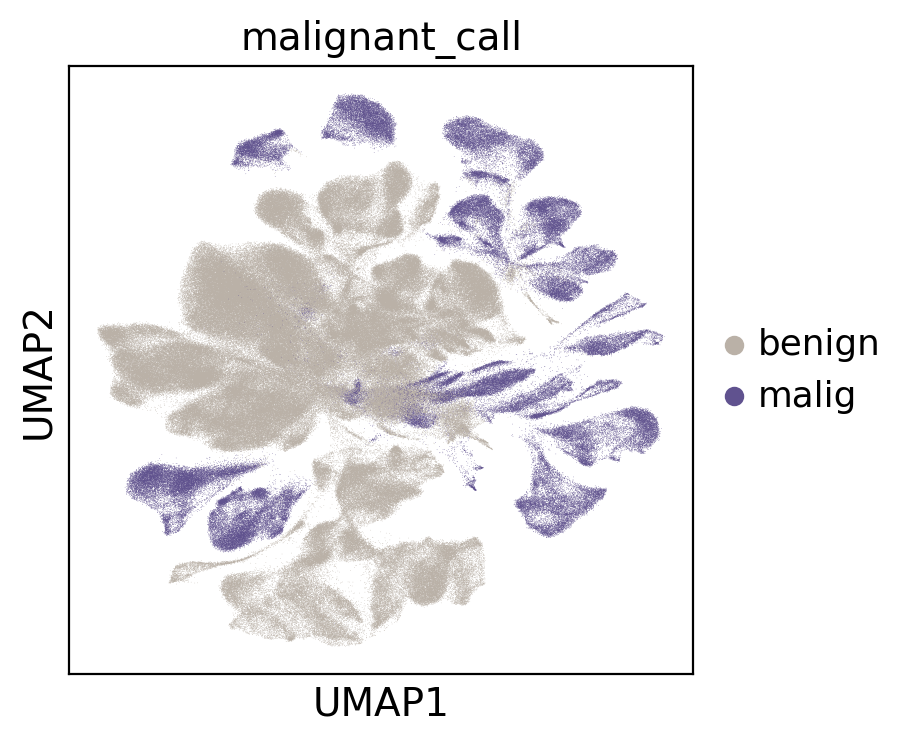

In [20]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color=['malignant_call'],palette = col)

In [21]:
sc.settings.set_figure_params(dpi=40, facecolor='white')
sc.pl.umap(adata, color=module_cols, frameon=False, vmin=-1, vmax=1, ncols=5)

In [22]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.pl.umap(adata, color=['malignant_call_donor'])

In [23]:
categories_order = ['panfetal_DN(early)_T','panfetal_DN(Q)_T','panfetal_DN(P)_T','panfetal_DP(Q)_T',
                    'panfetal_DP(P)_T', 'panfetal_CD8AA','panfetal_ABT(ENTRY)', 'panfetal_CD4+T','panfetal_CD8+T',
                    'panfetal_TREG','panfetal_CYCLING_T','panfetal_TYPE_1_INNATE_T', 'panfetal_TYPE_3_INNATE_T',
                    'PIPCytotoxic T cells','PIPHelper T cells','PIPFollicular helper T cells','PIPMemory CD4+ cytotoxic T cells',
                    'PIPCycling T cells','PIPMAIT cells','PIPILC','PIPRegulatory T cells','PIPTcm/Naive cytotoxic T cells','PIPTcm/Naive helper T cells',
                    'PIPTem/Effector helper T cells', 'PIPType 1 helper T cells','PIPType 17 helper T cells','PIPgamma-delta T cells',
                    'PIPNK cells', 'PIPCD16+ NK cells','PIPCD16- NK cells',
                    'benign_CTCL','benign_PTCL-NOS','benign_TLBL','benign_AITL','benign_pcALCL','benign_BIA-ALCL',
                    'malig_TL10712', 'malig_TL_MTK', 'malig_TL_Mangosteen','malig_TL_MAP006','malig_TL_KLT',
                    'malig_TL_SJH03','malig_pcALCL1','malig_pcALCL2','malig_TL3291','malig_TL5737','malig_TL5968','malig_TL5521',
                    'malig_TL2860','malig_TL5493', 'malig_TL6678','malig_TL6722','malig_TL4528','malig_TL8441',
                    'malig_CTCL1','malig_CTCL2','malig_CTCL3','malig_CTCL4','malig_CTCL5','malig_CTCL6','malig_CTCL7',
                    'malig_CTCL8']

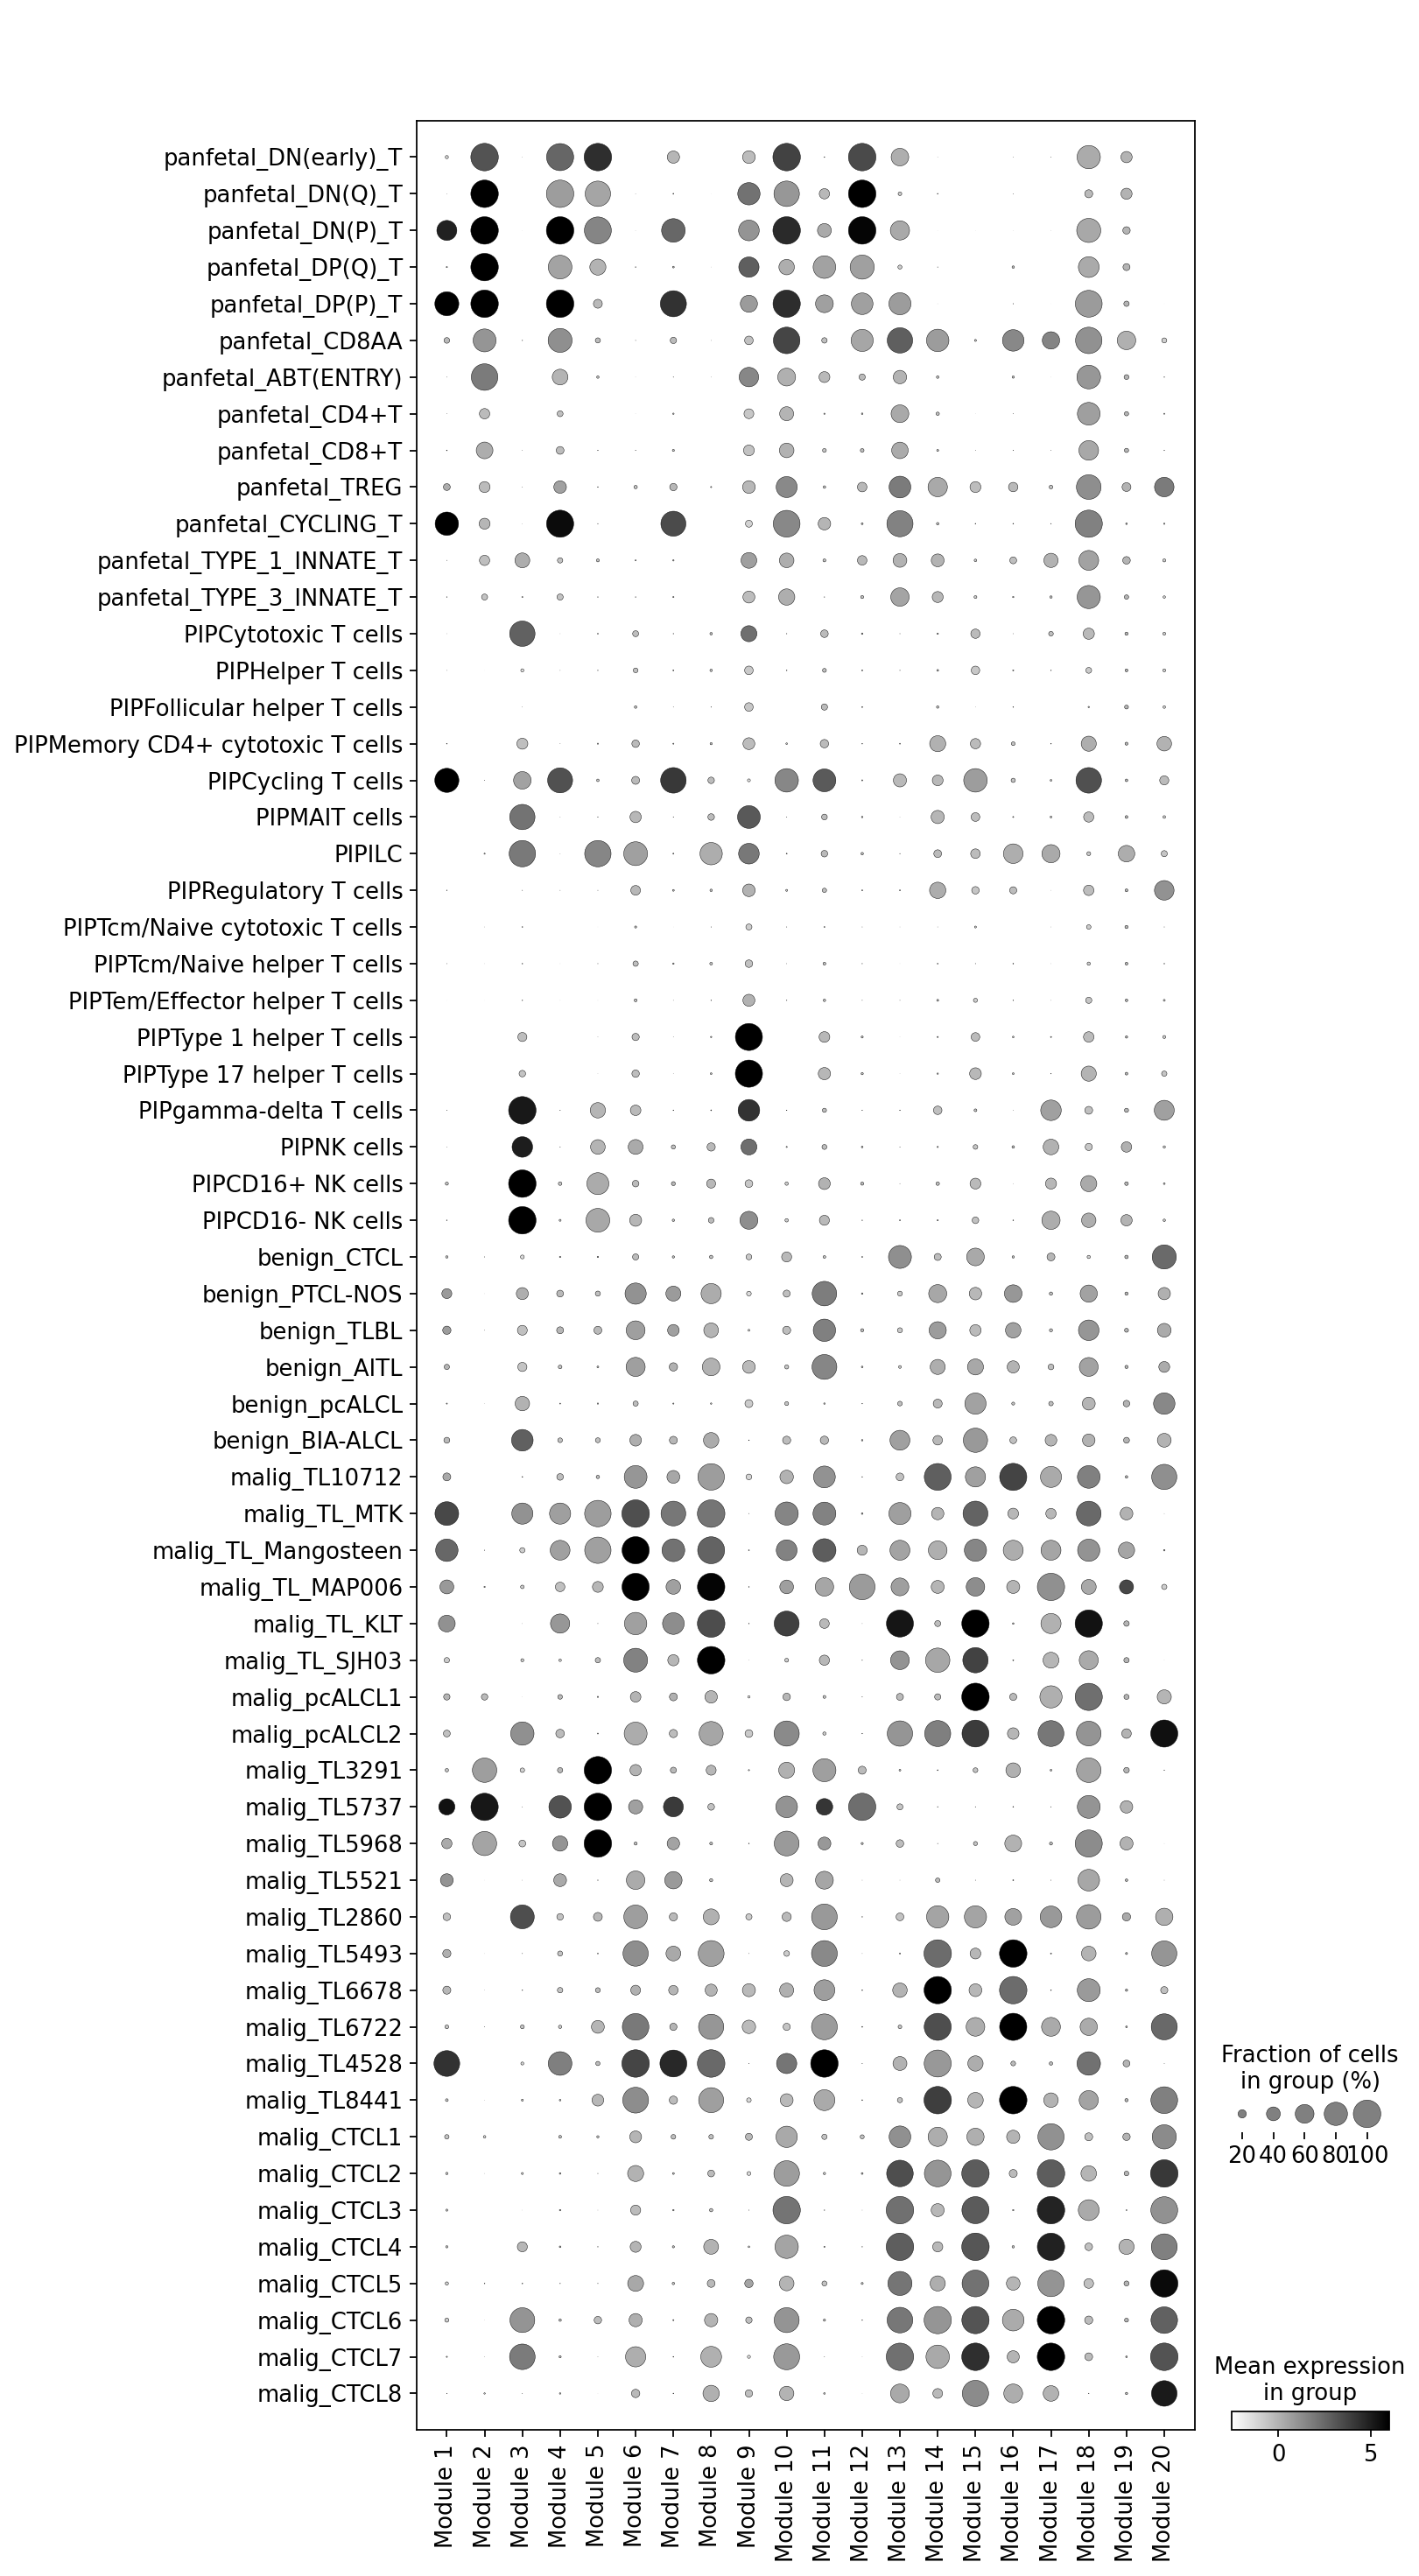

In [38]:
sc.settings.set_figure_params(dpi=80, facecolor='white')
dp = sc.pl.dotplot(adata, module_cols, groupby='malignant_call_donor', 
                   dendrogram = False, vmax=6, cmap='gray_r',categories_order = categories_order, save='.2.pdf')

In [26]:
ll = pd.read_csv('/lustre/scratch126/cellgen/team205/rl20/T_cell_lym/object/TCL_CLCT_pcALCL_panfetal_PIP_scVI_hotspot_neib30_layer1_latent10_fdr0.01_top1000_rmTCRgene.csv')
ll

Gene         C             Z      Pval       FDR  Module
0         FDCSP  0.325103  30833.109017  0.000000  0.000000    -1.0
1     MTRNR2L12  0.645822  11146.855332  0.000000  0.000000     6.0
2          FTH1  0.621087   7674.175438  0.000000  0.000000    20.0
3        IL1RL1  0.468336   7100.697180  0.000000  0.000000    20.0
4         ELANE  0.452992   6789.899275  0.000000  0.000000    -1.0
...         ...       ...           ...       ...       ...     ...
1995     DUOXA2 -0.000005     -0.164493  0.565329  0.566462     NaN
1996     IGFBP1 -0.000054     -0.198529  0.578684  0.579554     NaN
1997    MYADML2 -0.000087     -0.220983  0.587447  0.588035     NaN
1998      MMP10 -0.000043     -0.234854  0.592839  0.593136     NaN
1999     TMEM78 -0.000077     -0.268807  0.605961  0.605961     NaN

[2000 rows x 6 columns]